In [2]:
#Importing libraries
%matplotlib inline 
#plots
import matplotlib as mpl
import matplotlib.pyplot as plt
#Data Processing
import pandas as pd
#Math
import numpy as np
#Visualizations
import seaborn as sns

In [3]:
#Criando DataFrames para as tabelas

base_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='BASE')
origem_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='ORIGEM')
mercado_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='MERCADO')
local_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='LOCAL')
porte_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='PORTE')
objetivo_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='OBJETIVO')





In [4]:

# Definindo a coluna comum de junção (LEAD_ID)
coluna_juncao = 'LEAD_ID'

# Fazendo o merge das tabelas usando a função merge do pandas
# Aqui, estamos utilizando o método 'left' para manter todas as linhas do DataFrame 'base_df'
# e combinando as informações das outras tabelas com base no LEAD_ID
merged_df = base_df.merge(origem_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(mercado_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(local_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(porte_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(objetivo_df, on=coluna_juncao, how='left')

# Agora temos um DataFrame consolidado contendo todas as informações das tabelas unidas
# Podemos salvar esse DataFrame em um arquivo CSV
merged_df.to_csv('dados_unificados.csv', index=False)  # O parâmetro index=False evita salvar o índice do DataFrame no CSV

print("Todas as tabelas foram unidas e os dados foram salvos em 'dados_unificados.csv'.")


Todas as tabelas foram unidas e os dados foram salvos em 'dados_unificados.csv'.


In [5]:
# Carregar o conjunto de dados unificados do arquivo CSV para a variável df
df = pd.read_csv('dados_unificados.csv')

# Agora você pode trabalhar com o DataFrame df, que contém todos os dados unificados.
# Por exemplo, você pode usar a função head() para visualizar as primeiras linhas do DataFrame:
print(df.head())


    LEAD_ID        DATA CADASTRO VENDIDO MERCADO_x            ORIGEM  \
0  11316042  2021-02-10 16:23:30     NÃO    Varejo          Orgânico   
1  11374979  2021-02-17 11:10:28     NÃO    Varejo          Orgânico   
2  11997870  2021-04-15 11:06:00     NÃO    Varejo  Prospecção Ativa   
3  11930537  2021-04-09 13:10:21     NÃO    Varejo  Prospecção Ativa   
4  11899381  2021-04-07 13:13:49     NÃO    Varejo  Prospecção Ativa   

        SUB-ORIGEM MERCADO_y          LOCAL  PORTE           OBJETIVO  
0              NaN    Varejo     Belém - PA   1-10  Abertura/Expansão  
1              NaN    Varejo  São Paulo, SP  11-50                NaN  
2  Sales Navigator    Varejo              -    NaN                NaN  
3  Sales Navigator    Varejo              -    NaN                NaN  
4  Sales Navigator    Varejo              -    NaN                NaN  


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LEAD_ID        2333 non-null   int64 
 1   DATA CADASTRO  2333 non-null   object
 2   VENDIDO        2333 non-null   object
 3   MERCADO_x      2333 non-null   object
 4   ORIGEM         2333 non-null   object
 5   SUB-ORIGEM     1495 non-null   object
 6   MERCADO_y      2238 non-null   object
 7   LOCAL          2333 non-null   object
 8   PORTE          2138 non-null   object
 9   OBJETIVO       2120 non-null   object
dtypes: int64(1), object(9)
memory usage: 182.4+ KB


In [7]:
# Verificar se as colunas 'MERCADO_x' e 'MERCADO_y' são diferentes
if not df['MERCADO_x'].equals(df['MERCADO_y']):
    # Encontrar as linhas onde as colunas são diferentes
    linhas_diferentes = df[df['MERCADO_x'] != df['MERCADO_y']]
    # Imprimir as linhas onde ocorrem as diferenças
    print("As colunas 'MERCADO_x' e 'MERCADO_y' são diferentes nas seguintes linhas:")
    print(linhas_diferentes)
else:
    # Se as colunas forem iguais, manter apenas a coluna 'MERCADO_x'
    df = df.drop(columns=['MERCADO_y'])

# Agora o DataFrame df terá apenas a coluna 'MERCADO_x', caso as colunas sejam diferentes.


As colunas 'MERCADO_x' e 'MERCADO_y' são diferentes nas seguintes linhas:
       LEAD_ID        DATA CADASTRO VENDIDO MERCADO_x  ORIGEM  \
28    10566142  2020-12-01 05:46:39     NÃO         0  Google   
29    10572176  2020-12-01 12:26:28     NÃO         0  Google   
30    10581011  2020-12-01 18:02:28     NÃO         0  Google   
31    10621157  2020-12-05 09:53:30     NÃO         0  Google   
32    10608029  2020-12-03 17:10:25     NÃO         0  Google   
...        ...                  ...     ...       ...     ...   
2168  10595388  2020-12-02 22:04:37     NÃO         0  Google   
2169  10595392  2020-12-02 22:05:41     NÃO         0  Google   
2170  10578265  2020-12-01 15:57:12     NÃO         0  Google   
2171  10578279  2020-12-01 15:58:04     NÃO         0  Google   
2172  10628730  2020-12-07 10:35:30     NÃO         0     rep   

                 SUB-ORIGEM MERCADO_y                      LOCAL     PORTE  \
28             google - cpc       NaN             Cariacica - ES   

In [8]:
#Vamos manter apenas uma coluna Mercado
df = df.drop(columns=['MERCADO_y'])


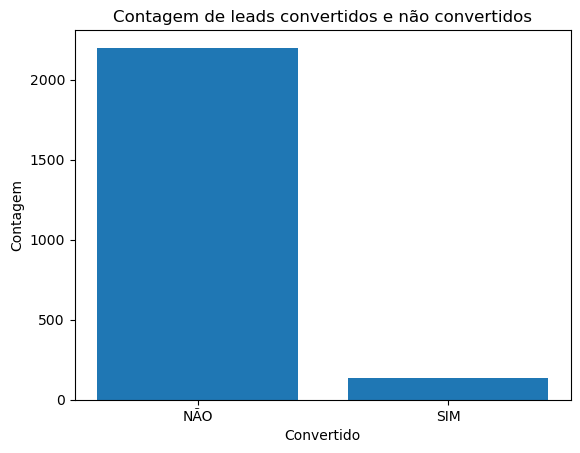

In [15]:
# Contar a ocorrência de cada valor na coluna 'VENDIDO'
contagem_vendido = df['VENDIDO'].value_counts()

# Criar o gráfico de barras
plt.bar(contagem_vendido.index, contagem_vendido.values)

# Definir os rótulos do eixo x e y
plt.xlabel('Convertido')
plt.ylabel('Contagem')

# Definir o título do gráfico
plt.title('Contagem de leads convertidos e não convertidos')

# Mostrar o gráfico
plt.show()


In [22]:
# Criar um novo DataFrame para armazenar a tabela de contagem
tabela_contagem = pd.DataFrame({
    'VENDIDO': ['SIM', 'NÃO'],
    'Contagem': [contagem_vendido['SIM'], contagem_vendido['NÃO']]
})

# Calcular a taxa de conversão
total_leads = df.shape[0]
leads_convertidos = contagem_vendido['SIM']
taxa_conversao = (leads_convertidos / total_leads) * 100



# Exibir a tabela de contagem e a taxa de conversão
print(tabela_contagem)
print(f'Taxa de Conversão: {taxa_conversao:.2f}%')

  VENDIDO  Contagem
0     SIM       134
1     NÃO      2199
Taxa de Conversão: 5.74%


In [17]:
# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
df['ESTADO'] = df['LOCAL'].str[-2:]

# Exibir as primeiras linhas do DataFrame com a nova coluna 'ESTADO'
print(df.head())


    LEAD_ID        DATA CADASTRO VENDIDO MERCADO_x            ORIGEM  \
0  11316042  2021-02-10 16:23:30     NÃO    Varejo          Orgânico   
1  11374979  2021-02-17 11:10:28     NÃO    Varejo          Orgânico   
2  11997870  2021-04-15 11:06:00     NÃO    Varejo  Prospecção Ativa   
3  11930537  2021-04-09 13:10:21     NÃO    Varejo  Prospecção Ativa   
4  11899381  2021-04-07 13:13:49     NÃO    Varejo  Prospecção Ativa   

        SUB-ORIGEM          LOCAL  PORTE           OBJETIVO ESTADO  
0              NaN     Belém - PA   1-10  Abertura/Expansão     PA  
1              NaN  São Paulo, SP  11-50                NaN     SP  
2  Sales Navigator              -    NaN                NaN      -  
3  Sales Navigator              -    NaN                NaN      -  
4  Sales Navigator              -    NaN                NaN      -  


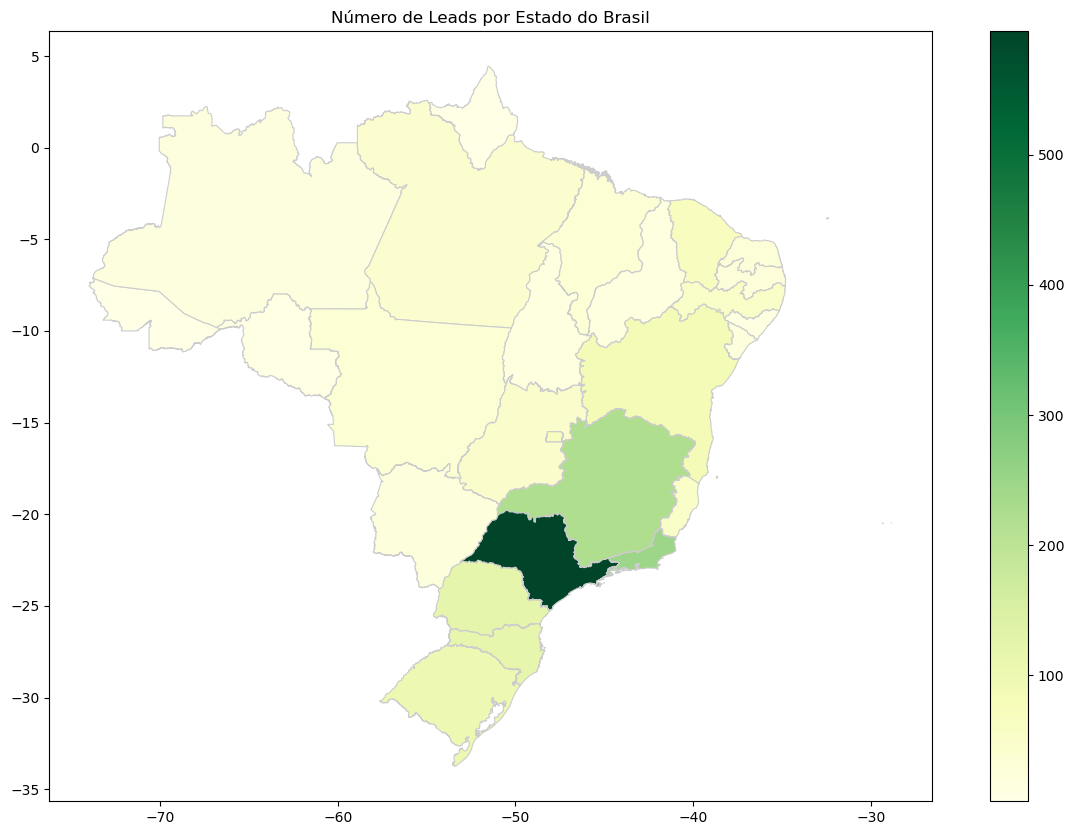

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geobr

# Contar o número de leads por estado
contagem_leads = df['ESTADO'].value_counts()

# Carregar os dados geográficos dos estados brasileiros diretamente usando geobr
map_df = geobr.read_state()

# Juntar os dados de contagem de leads com os dados geográficos
merged_df = map_df.set_index('abbrev_state').join(contagem_leads)

# Plotar o mapa com o número de leads por estado
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='ESTADO', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Definir o título do gráfico
plt.title('Número de Leads por Estado do Brasil')

# Exibir o mapa
plt.show()



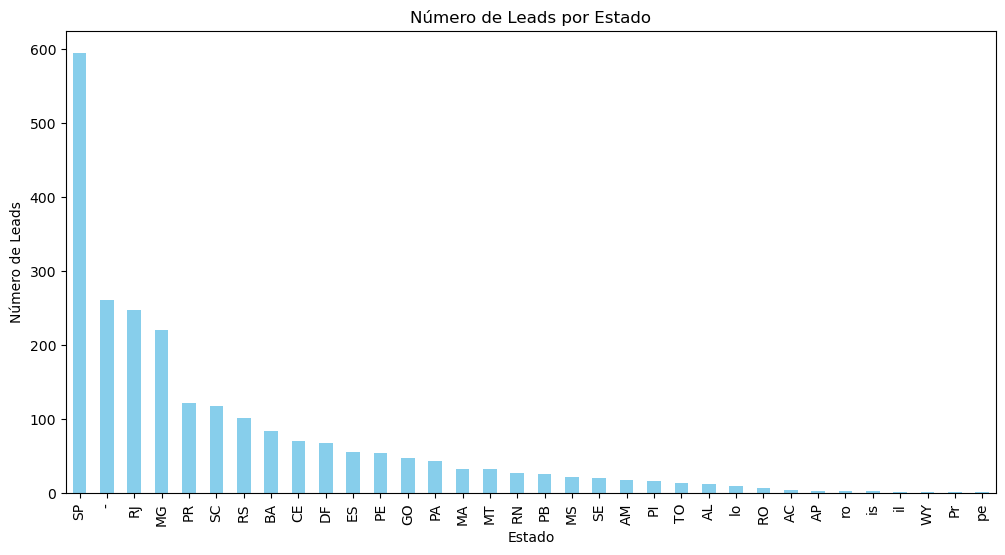

In [31]:
# Contar o número de leads por estado
contagem_leads = df['ESTADO'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads.plot(kind='bar', color='skyblue')

# Definir título e rótulos dos eixos
plt.title('Número de Leads por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Leads')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir o barplot
plt.show()


In [24]:
# Contar o número de leads por estado
contagem_leads = df['ESTADO'].value_counts()

# Criar uma tabela com o número de leads por estado em ordem decrescente
tabela_leads_por_estado = pd.DataFrame({
    'Estado': contagem_leads.index,
    'Número de Leads': contagem_leads.values
})

# Ordenar a tabela em ordem decrescente pelo número de leads
tabela_leads_por_estado = tabela_leads_por_estado.sort_values(by='Número de Leads', ascending=False)

# Exibir a tabela em ordem decrescente dos estados com mais leads
print(tabela_leads_por_estado)


   Estado  Número de Leads
0      SP              595
1       -              261
2      RJ              247
3      MG              221
4      PR              121
5      SC              118
6      RS              102
7      BA               84
8      CE               70
9      DF               68
10     ES               55
11     PE               54
12     GO               47
13     PA               43
14     MA               32
15     MT               32
16     RN               27
17     PB               25
18     MS               21
19     SE               20
20     AM               17
21     PI               16
22     TO               13
23     AL               12
24     lo               10
25     RO                7
26     AC                4
27     AP                3
28     ro                2
29     is                2
30     il                1
31     WY                1
32     Pr                1
33     pe                1


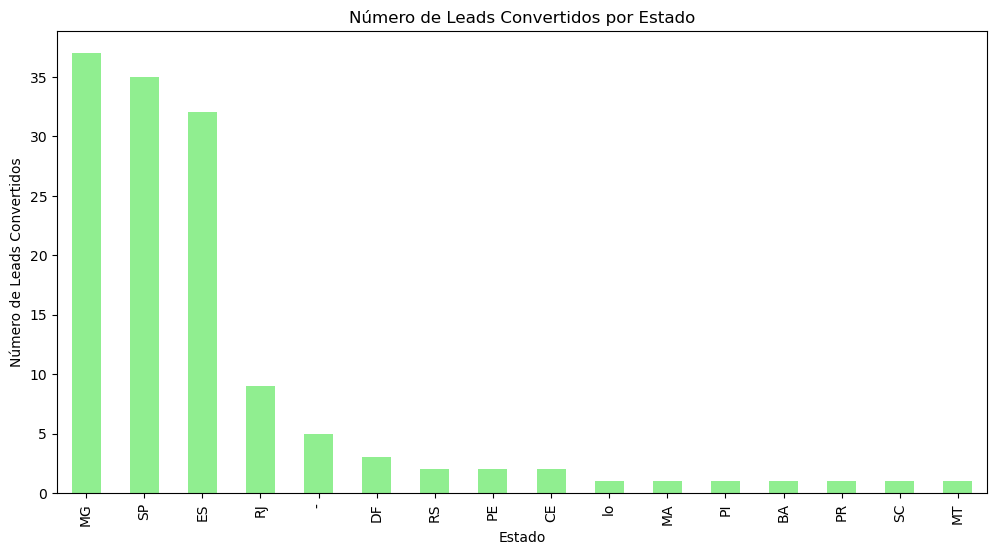

In [32]:
# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()

# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Contar o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_convertidos.plot(kind='bar', color='lightgreen')

# Definir título e rótulos dos eixos
plt.title('Número de Leads Convertidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Leads Convertidos')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir o barplot
plt.show()


In [26]:
# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()

# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Contar o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Criar uma tabela com o número de leads convertidos por estado em ordem decrescente
tabela_leads_convertidos_por_estado = pd.DataFrame({
    'Estado': contagem_leads_convertidos.index,
    'Número de Leads Convertidos': contagem_leads_convertidos.values
})

# Ordenar a tabela em ordem decrescente pelo número de leads convertidos
tabela_leads_convertidos_por_estado = tabela_leads_convertidos_por_estado.sort_values(by='Número de Leads Convertidos', ascending=False)

# Exibir a tabela em ordem decrescente dos estados com mais leads convertidos
print(tabela_leads_convertidos_por_estado)



   Estado  Número de Leads Convertidos
0      MG                           37
1      SP                           35
2      ES                           32
3      RJ                            9
4       -                            5
5      DF                            3
6      RS                            2
7      PE                            2
8      CE                            2
9      lo                            1
10     MA                            1
11     PI                            1
12     BA                            1
13     PR                            1
14     SC                            1
15     MT                            1


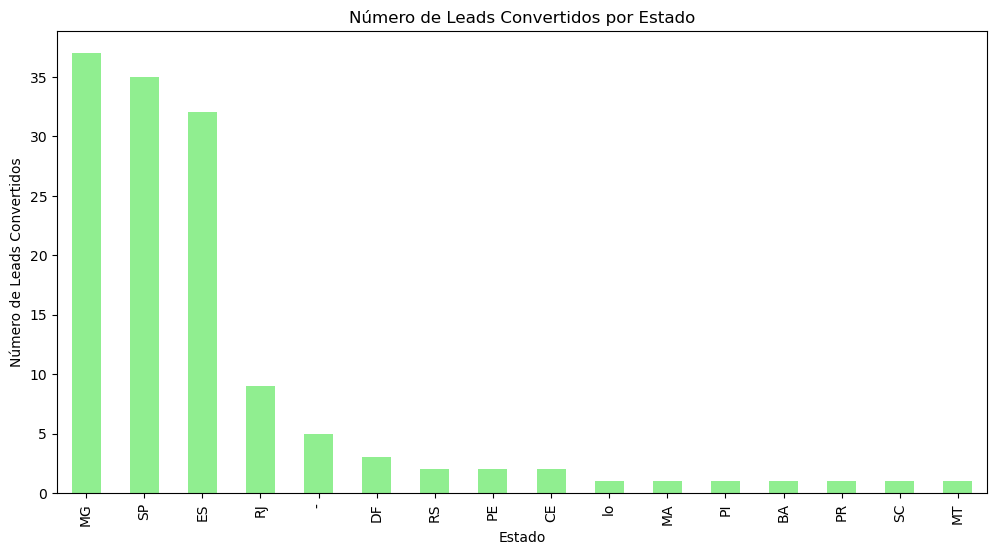

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o conjunto de dados unificados do arquivo CSV para a variável df
df = pd.read_csv('dados_unificados.csv')

# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()

# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Contar o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_convertidos.plot(kind='bar', color='lightgreen')

# Definir título e rótulos dos eixos
plt.title('Número de Leads Convertidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Leads Convertidos')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir o barplot
plt.show()


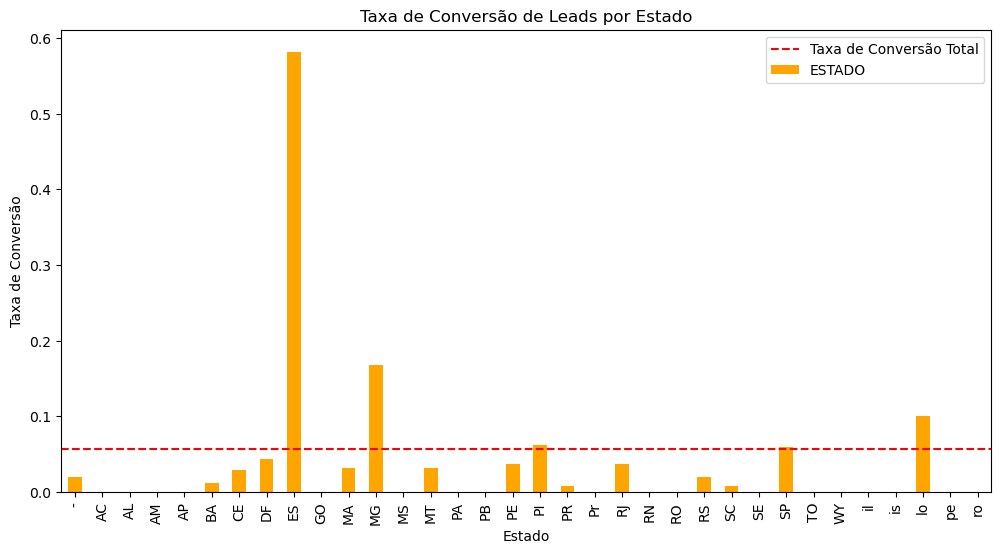

In [37]:
# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado em ambos os DataFrames
df['ESTADO'] = df['LOCAL'].str[-2:]
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Calcular o número total de leads por estado
contagem_total_leads = df['ESTADO'].value_counts()

# Calcular o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Calcular a taxa de conversão de leads por estado
taxa_conversao = contagem_leads_convertidos / contagem_total_leads

# Calcular a taxa de conversão total
taxa_conversao_total = contagem_leads_convertidos.sum() / contagem_total_leads.sum()

# Criar o gráfico de taxa de conversão
plt.figure(figsize=(12, 6))
taxa_conversao.plot(kind='bar', color='orange')

# Adicionar a linha horizontal para a taxa de conversão total
plt.axhline(y=taxa_conversao_total, color='red', linestyle='--', label='Taxa de Conversão Total')

# Definir título e rótulos dos eixos
plt.title('Taxa de Conversão de Leads por Estado')
plt.xlabel('Estado')
plt.ylabel('Taxa de Conversão')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir a legenda
plt.legend()

# Exibir o gráfico de taxa de conversão
plt.show()


In [36]:
# Criar a tabela com as taxas de conversão em ordem decrescente
tabela_taxa_conversao = pd.DataFrame({
    'Estado': taxa_conversao.index,
    'Taxa de Conversão': taxa_conversao.values
})

# Ordenar a tabela em ordem decrescente pela taxa de conversão
tabela_taxa_conversao = tabela_taxa_conversao.sort_values(by='Taxa de Conversão', ascending=False)

# Exibir a tabela em ordem decrescente das taxas de conversão
print(tabela_taxa_conversao)


   Estado  Taxa de Conversão
8      ES           0.581818
11     MG           0.167421
31     lo           0.100000
17     PI           0.062500
26     SP           0.058824
7      DF           0.044118
16     PE           0.037037
20     RJ           0.036437
10     MA           0.031250
13     MT           0.031250
6      CE           0.028571
23     RS           0.019608
0       -           0.019157
5      BA           0.011905
24     SC           0.008475
18     PR           0.008264
1      AC                NaN
2      AL                NaN
3      AM                NaN
4      AP                NaN
9      GO                NaN
12     MS                NaN
14     PA                NaN
15     PB                NaN
19     Pr                NaN
21     RN                NaN
22     RO                NaN
25     SE                NaN
27     TO                NaN
28     WY                NaN
29     il                NaN
30     is                NaN
32     pe                NaN
33     ro     